# Linear Regression Vectorized

Vectorized Implementation of Linear Regression

In [16]:
from collections import namedtuple

Model = namedtuple('Model', ['w', 'b', 'dW', 'db', 'y_hats', 'dlosses', 'dy_hats', 'loss'])

def lin_reg(X, W=None, b=0.0, ys=None, learning_rate=0.001):
    """Run gradient descent on multiple training examples
    
    Yield successive states of the model
    
    """
    N, M = X.shape
    (M,) = ys.shape
        
    W = np.array([0.0]) if not W else W
    b = 0.0
    
    while True:
        # Forward Pass (predictions)
        y_hats = W @ X + b

        # Compute loss (negate loss so we can think of maximizing output of the network)
        losses = 0.5 * (y_hats-ys)**2
        loss = sum(losses) / M

        # Backpropagate to find dw and db
        dlosses = np.ones_like(losses)
        dy_hats = (y_hats-ys) * dlosses
        db = sum(dy_hats)
        dW = dy_hats @ X.T
        
        # Normalize by the number of training examples
        db /= M
        dW /= M

        yield Model(*W, b, *dW, db, y_hats, dlosses, dy_hats, loss)

        # Gradient descent
        W -= learning_rate*dW
        b -= learning_rate*db

## Create Synthetic Data

/home/ebanner/.anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


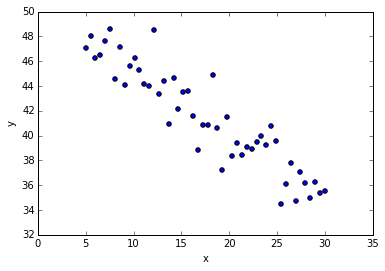

In [28]:
M = 50

X_train = np.linspace(5, 30, num=M)
w_true, b = np.array([-0.5]), 50

# Compute ys
noise_level = 2
ys_train = w_true[0]*X_train + b
ys_train = np.array([y + np.random.randn()*noise_level for y in ys_train])

pd.DataFrame({'x': X_train, 'y': ys_train}).plot(kind='scatter', x='x', y='y')

## Visualize the Model

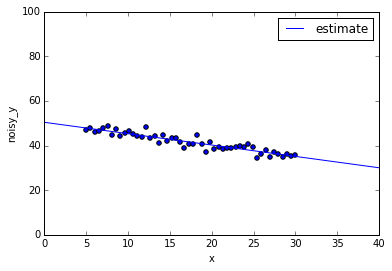

In [29]:
from ipywidgets import interact, fixed

estimate = lin_reg(X_train.reshape(1,M), ys=ys_train, learning_rate=0.003)
estimates = [next(estimate) for _ in range(20000)]

@interact(X=fixed(X_train), ys=fixed(ys_train), view_index=(0, len(estimates)), estimates=fixed(estimates))
def plot(X, ys, view_index, estimates):
    w, b, _, _, _, _, _, _ = estimates[view_index]
    
    xs = np.linspace(0, 50)
    
    # Get data into suitable form for plotting
    df1 = pd.DataFrame({'x': X, 'noisy_y': ys})
    df2 = pd.DataFrame({'x': xs, 'estimate': w*xs + b})
    
    # Plot
    axes = df1.plot(kind='scatter', x='x', y='noisy_y')
    axes = df2.plot(ax=axes, x='x', y='estimate')
    
    axes.set_ylim(0,100)
    axes.set_xlim(0,40)

In [280]:
estimate = lin_reg(X_train.reshape(1,M), ys=ys_train, learning_rate=0.005)
estimates = [next(estimate) for _ in range(100)]

df = pd.DataFrame(estimates, columns=Model._fields)